In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path
import os

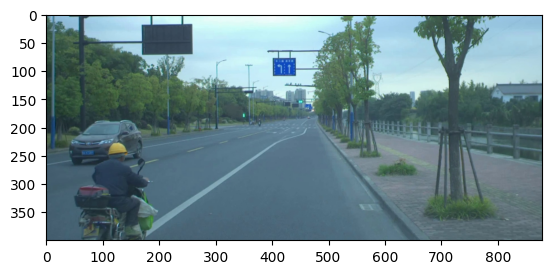

60


In [2]:
frames = []

for child in Path('../data/stereo_video/').iterdir():
    if child.is_file():
        frames.append(cv2.cvtColor(cv2.imread('../data/stereo_video/' + child.name), cv2.COLOR_BGR2RGB))
plt.imshow(frames[0])
plt.show()
print(len(frames))

type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  29
max :  250
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 60 18  2]
 [ 0  0  0 ... 15  1 14]
 [ 0  0  0 ...  4 12 53]]


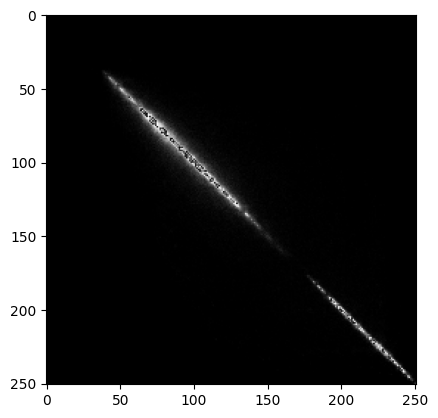

normalized GLCM


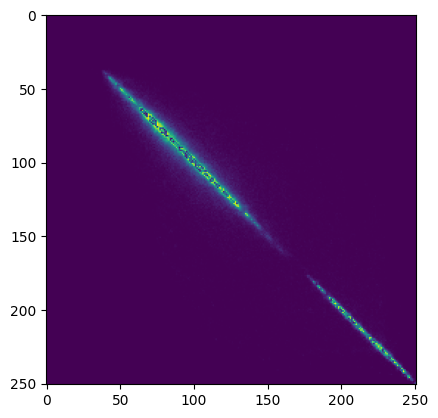

In [3]:
def glcm(image, d):
  print('type : ', type(image))
  print('shape : ', image.shape)
  print('min : ', np.min(image))
  print('max : ', np.max(image))
   
  glcm_mat = np.zeros((np.max(image) + 1, np.max(image) + 1), dtype=np.uint8)

  for x in range(image.shape[1]-1):
      for y in range(image.shape[0]-1):
        if (x < image.shape[1]) and (y < image.shape[0]) and (x + d[0]) < image.shape[1] and (y + d[1]) < image.shape[0]:
              i = image[y,x]
              j = image[y + d[1],x+d[0]]
              glcm_mat[j,i] = glcm_mat[j,i] + 1

  return glcm_mat

glcm_mat = glcm(cv2.cvtColor(frames[0], cv2.COLOR_RGB2GRAY), [1,1])
print(glcm_mat)
plt.imshow(glcm_mat, cmap='gray')

# Normalize the GLCM
glcm_mat = glcm_mat / np.max(glcm_mat)
plt.show()
print('normalized GLCM')
plt.imshow(glcm_mat * 255)

type :  <class 'numpy.ndarray'>
shape :  (400, 879, 3)
min :  5
max :  255
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...  50 165  37]
 [  0   0   0 ... 180 182  47]
 [  0   0   0 ...  50  70  30]]


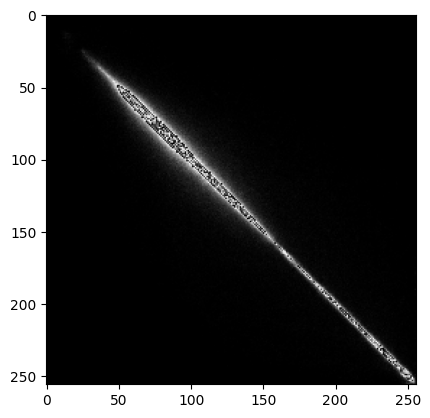

In [4]:
glcm_mat = glcm(frames[1], [1, 1])
print(glcm_mat)
plt.imshow(glcm_mat, cmap='gray')

type :  <class 'numpy.ndarray'>
shape :  (400, 879, 3)
min :  14
max :  255
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 209  80 171]
 [  0   0   0 ...  48  54 184]
 [  0   0   0 ... 212 174 130]]


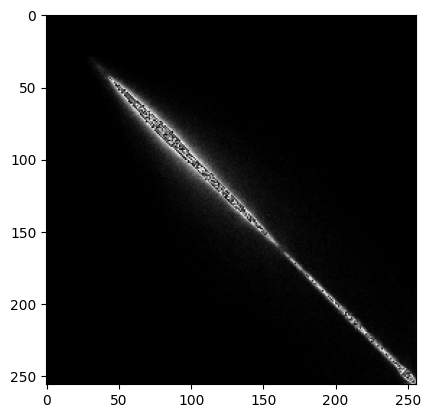

In [5]:
glcm_mat = glcm(frames[30], [1, 1])
print(glcm_mat)
plt.imshow(glcm_mat, cmap='gray')

GLCM of the segmented images

segmentedimage_1_2018-10-31-06-55-01_2018-10-31-07-00-50-232.jpg


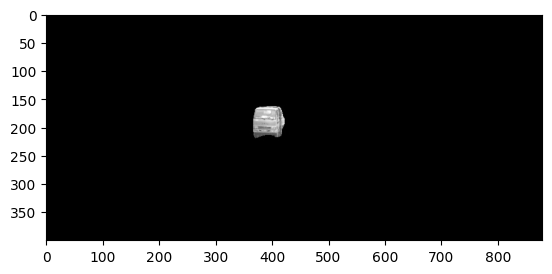

segmentedimage_2_2018-10-31-06-55-01_2018-10-31-07-00-50-730.jpg


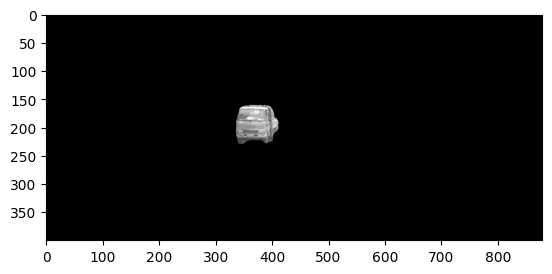

segmentedimage_3_2018-10-31-06-55-01_2018-10-31-07-00-51-229.jpg


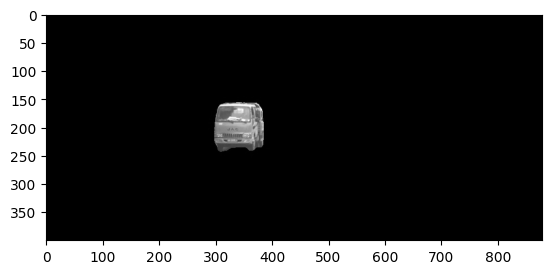

segmentedimage_4_2018-10-31-06-55-01_2018-10-31-07-00-51-529.jpg


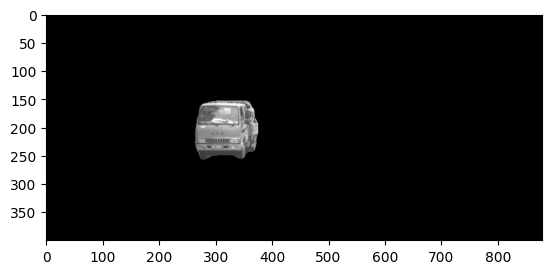

segmentedimage_5_2018-10-31-06-55-01_2018-10-31-07-00-51-729.jpg


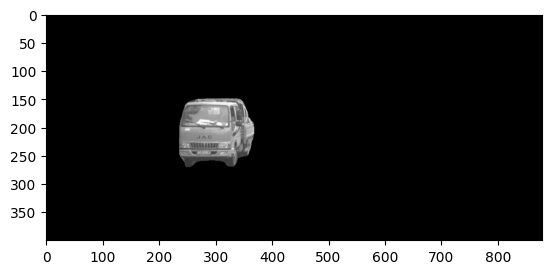

In [6]:
images = []

for child in Path('../data/segmented_images/').iterdir():
    if child.is_file():
        images.append(cv2.imread('../data/segmented_images/' + child.name))
        images[-1] = cv2.cvtColor(images[-1], cv2.COLOR_RGB2GRAY)
    
        print(child.name)
        plt.imshow(images[-1], cmap='gray')
        plt.show()

In [7]:
# Features derived from the GLCM.
def get_uniformaty(glcm_matrix):
   # Sum of square of entry in matrix.
   u = 0
   for x in range(glcm_matrix.shape[1]):
      for y in range(glcm_matrix.shape[0]):
         u = glcm_matrix[y, x] * glcm_matrix[y, x]
   
   return u 

original image


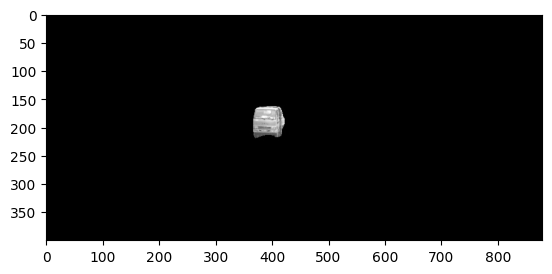

d = [1, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  1.562280304332203e-05
Maximum probability 0.06398583712696004
glcm matrix


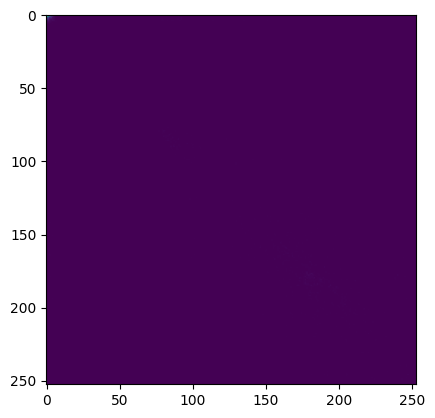

d = [1, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0011659726353361096
Maximum probability 0.051846231664137585
glcm matrix


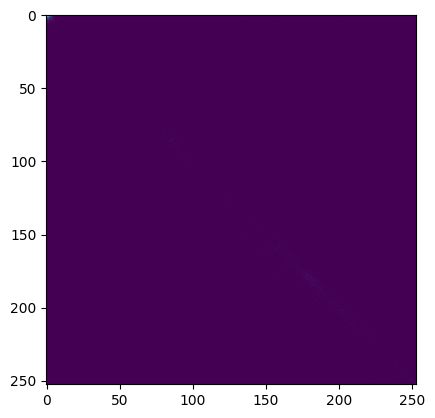

d = [0, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.00012209639510393455
Maximum probability 0.045776428932726355
glcm matrix


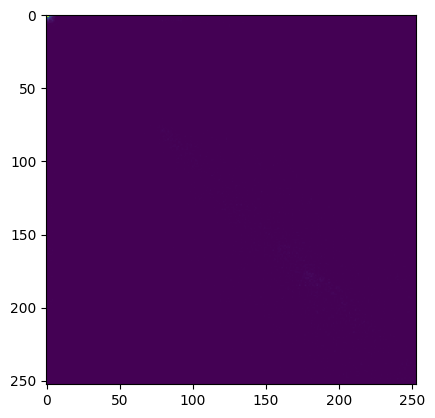

d = [0, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0026298487836949372
Maximum probability 0.06798373038930854
glcm matrix


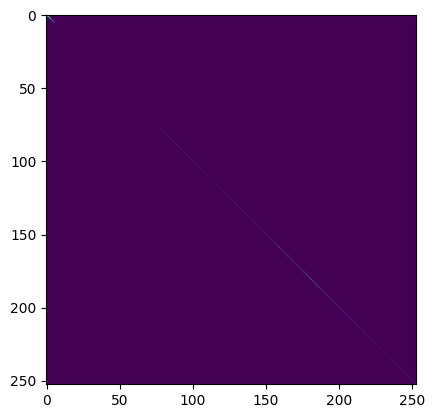

original image


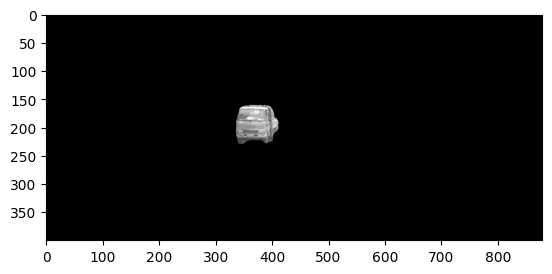

d = [1, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  3.501277966457757e-05
Maximum probability 0.032288880397401604
glcm matrix


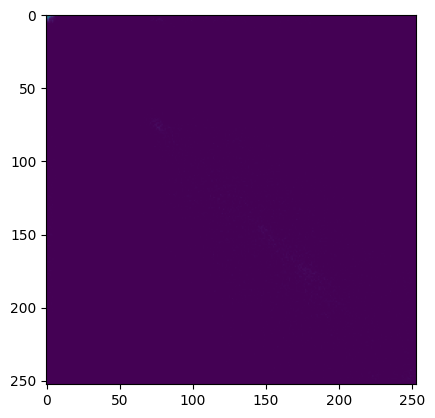

d = [1, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0
Maximum probability 0.04403063000348068
glcm matrix


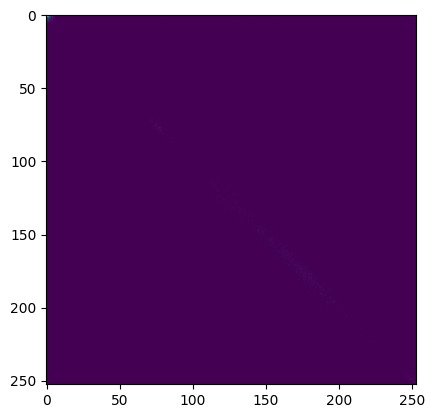

d = [0, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0
Maximum probability 0.03588342440801457
glcm matrix


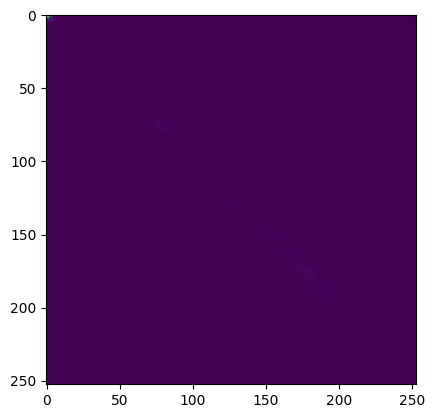

d = [0, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0003960298012425435
Maximum probability 0.042566709021601014
glcm matrix


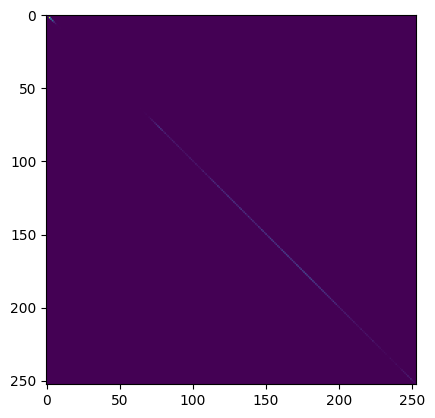

original image


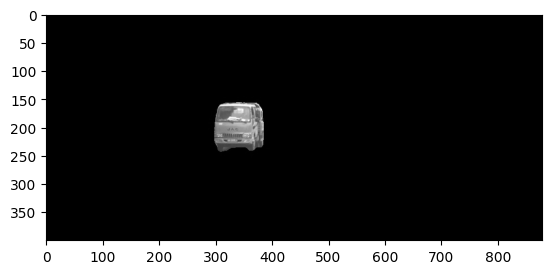

d = [1, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  254
UNIFORMATY :  0.0
Maximum probability 0.017142857142857144
glcm matrix


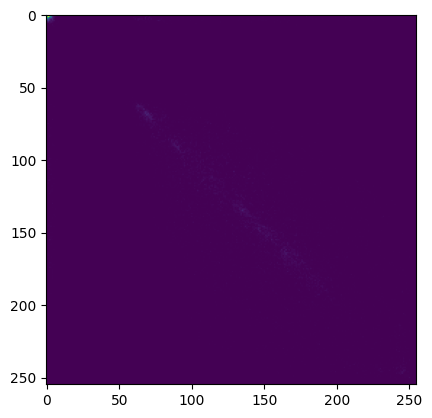

d = [1, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  254
UNIFORMATY :  0.0
Maximum probability 0.023597399470262462
glcm matrix


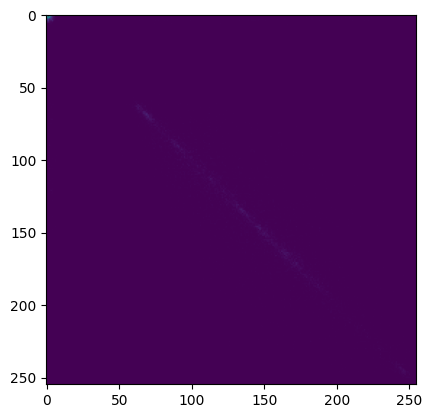

d = [0, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  254
UNIFORMATY :  0.0
Maximum probability 0.02672766674692993
glcm matrix


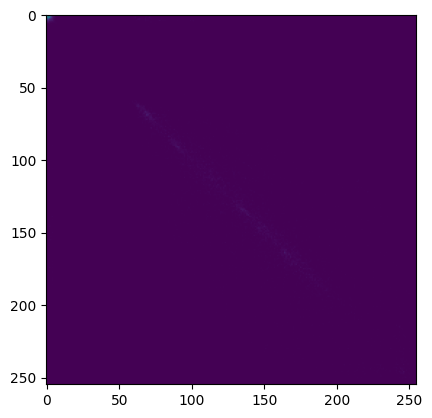

d = [0, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  254
UNIFORMATY :  2.3564897728343855e-05
Maximum probability 0.027328203767577608
glcm matrix


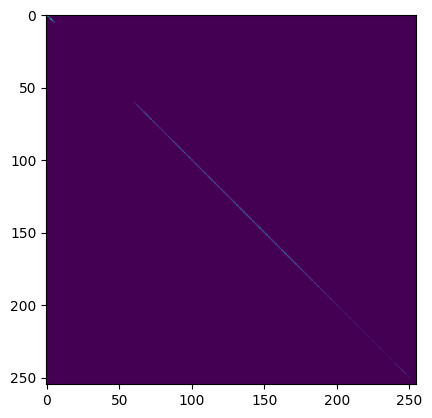

original image


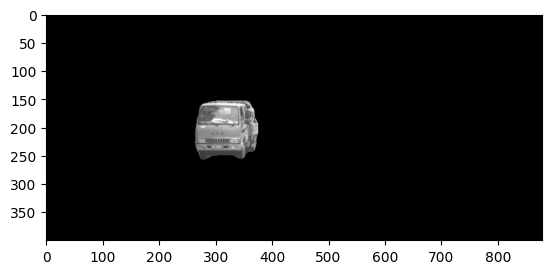

d = [1, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  251
UNIFORMATY :  0.0
Maximum probability 0.020715145263881726
glcm matrix


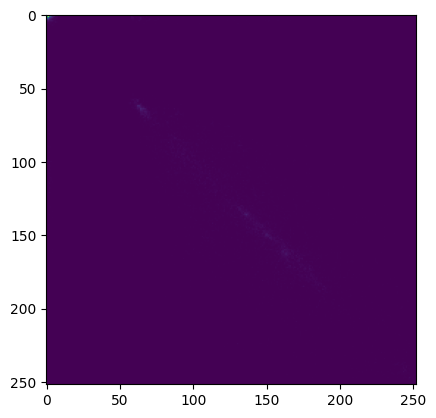

d = [1, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  251
UNIFORMATY :  3.0524098775983637e-05
Maximum probability 0.015557847687811587
glcm matrix


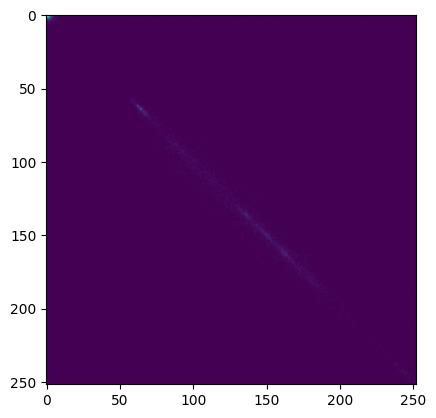

d = [0, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  251
UNIFORMATY :  0.0
Maximum probability 0.014010658414990544
glcm matrix


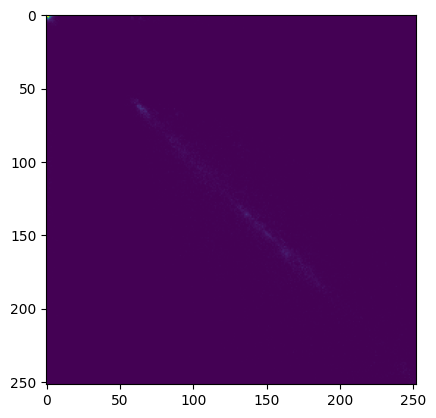

d = [0, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  251
UNIFORMATY :  0.0017604772849528095
Maximum probability 0.013477851083883129
glcm matrix


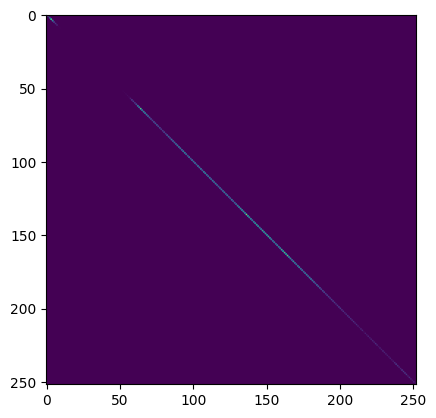

original image


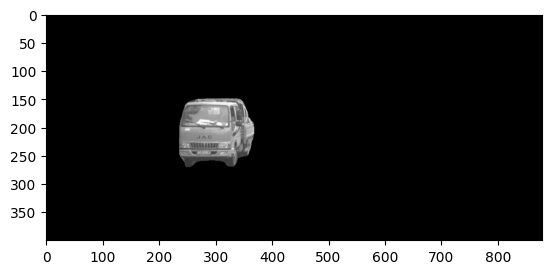

d = [1, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  1.6e-05
Maximum probability 0.016156132868036705
glcm matrix


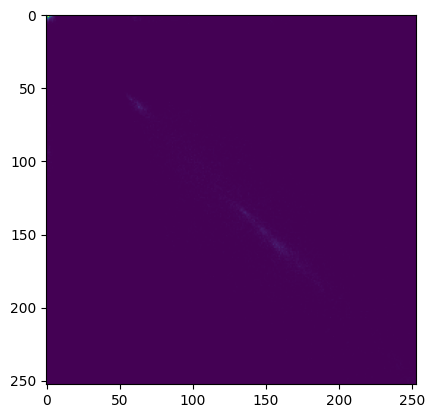

d = [1, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0
Maximum probability 0.011761664727930722
glcm matrix


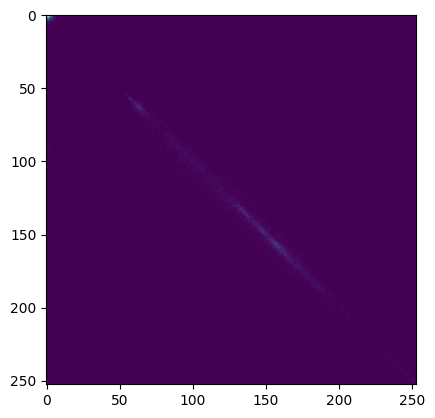

d = [0, 1]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0
Maximum probability 0.015509887553315239
glcm matrix


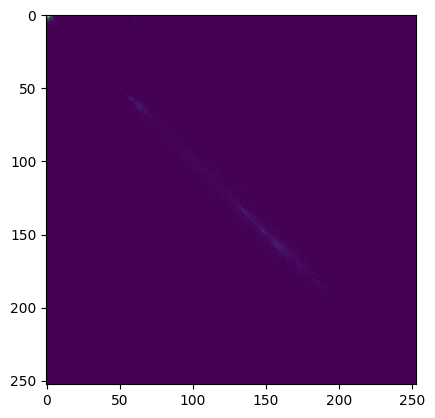

d = [0, 0]
type :  <class 'numpy.ndarray'>
shape :  (400, 879)
min :  0
max :  252
UNIFORMATY :  0.0007073336351290176
Maximum probability 0.01301038062283737
glcm matrix


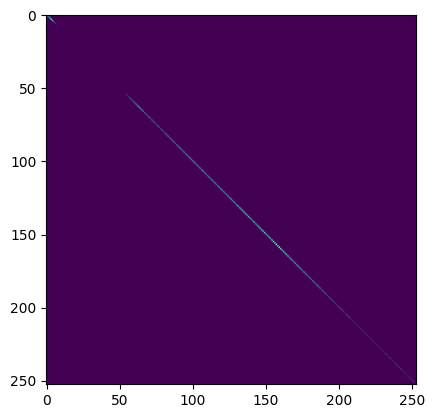

In [10]:
ds = [[1, 1], [1, 0], [0, 1], [0, 0]]

for image in images:
    print('original image')
    plt.imshow(image, cmap='gray')
    plt.show()
    for d in ds:
        print("d =", d)
        glcm_mat = glcm(image, d)
        print('UNIFORMATY : ', get_uniformaty(glcm_mat / np.max(glcm_mat)))
        print('Maximum probability', np.max(glcm_mat) / np.sum(glcm_mat))
        print('glcm matrix')
        plt.imshow(glcm_mat)
        plt.show()
